# Unitary cost function gradient descent

Created 27/09/2024

Objectives:
* Apply gradient descent algorithm to a large matrix to see wether it converges to some unitary.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import unitary_group

In [2]:
N = 2**6

In [3]:
N

64

In [4]:
def unitary_score(X):
    diff = X @ np.conj(X.T)
    for i in range(N):
        diff[i,i] -= 1

    return np.linalg.norm(diff)

Test unitary_score function:

In [5]:
test_unitary_scores = list()

for _ in range(100):
    U = unitary_group.rvs(N)
    test_unitary_scores.append(unitary_score(U))

In [6]:
max(test_unitary_scores)

8.831364184582428e-15

In [117]:
def grad_descent_step(X, learning_rate=1):
    X_c = np.conj(X.T)

    X3 = np.matmul(np.matmul(X, X_c), X)

    delta = 0.5*(X - X3)

    return learning_rate*delta

In [223]:
def scaled_grad_descent_step(X, learning_rate=1, scale_factor=1):
    X_c = np.conj(X.T)

    X3 = np.matmul(np.matmul(X, X_c), X)

    delta = 0.5*(X - X3)

    score = unitary_score(X)
    return learning_rate*delta/(1+scale_factor*score)

Be more systematic with testing.
1. Scalars
2. Unitaries
    * Exact and approximate, large and small.
3. Arbitrary
    * Large and small

Sweep over learning rate parameters. Are there specific threshold values?

# Scalars

In [118]:
N=1

In [119]:
unitary_scores = list()

In [120]:
X = np.random.rand(N, N) + 1j*np.random.rand(N, N)

In [121]:
unitary_scores.append(unitary_score(X))

In [122]:
np.round(X, 2)

array([[0.12+0.69j]])

In [123]:
np.round(grad_descent_step(X), 2)

array([[0.03+0.18j]])

In [124]:
for _ in range(300):
    X+=grad_descent_step(X)
    unitary_scores.append(unitary_score(X))

In [134]:
unitary_scores_1 = list()
X = np.array([[0.1]]).astype('float')
unitary_scores_1.append(unitary_score(X))
for _ in range(30):
    X+=grad_descent_step(X)
    unitary_scores_1.append(unitary_score(X))

In [137]:
unitary_scores_2 = list()
X = np.array([[1000]]).astype('float')
unitary_scores_2.append(unitary_score(X))
for _ in range(30):
    X+=grad_descent_step(X)
    unitary_scores_2.append(unitary_score(X))

/var/folders/r3/xn8xq5c17932m2g1b4r3dss80000gn/T/ipykernel_29138/2475999233.py:2: RuntimeWarning: overflow encountered in matmul
  diff = X @ np.conj(X.T)
/var/folders/r3/xn8xq5c17932m2g1b4r3dss80000gn/T/ipykernel_29138/3560967508.py:4: RuntimeWarning: overflow encountered in matmul
  X3 = np.matmul(np.matmul(X, X_c), X)
/var/folders/r3/xn8xq5c17932m2g1b4r3dss80000gn/T/ipykernel_29138/3560967508.py:6: RuntimeWarning: invalid value encountered in subtract
  delta = 0.5*(X - X3)


/var/folders/r3/xn8xq5c17932m2g1b4r3dss80000gn/T/ipykernel_29138/3424074581.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


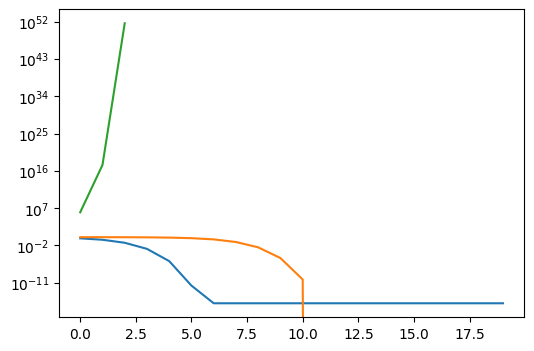

In [138]:
fig, ax = plt.subplots(figsize=(6,4))

num_points=20

ax.plot(unitary_scores[:num_points])
ax.plot(unitary_scores_1[:num_points])
ax.plot(unitary_scores_2[:num_points])
ax.set_yscale('log')

fig.show()

# Unitaries

## Exact

In [146]:
N=64

In [147]:
unitary_scores = list()

In [148]:
X = unitary_group.rvs(N)

In [149]:
unitary_scores.append(unitary_score(X))

In [150]:
unitary_scores[-1]

7.468259030714992e-15

In [151]:
for _ in range(300):
    X+=grad_descent_step(X)
    unitary_scores.append(unitary_score(X))

/var/folders/r3/xn8xq5c17932m2g1b4r3dss80000gn/T/ipykernel_29138/1554473286.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


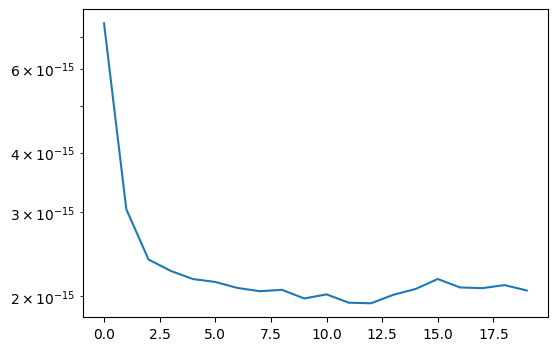

In [152]:
fig, ax = plt.subplots(figsize=(6,4))

num_points=20

ax.plot(unitary_scores[:num_points])
#ax.plot(unitary_scores_1[:num_points])
#ax.plot(unitary_scores_2[:num_points])
ax.set_yscale('log')

fig.show()

In [153]:
unitary_scores[-1]

2.2481047283735794e-15

## Approximate

In [154]:
N=64

In [177]:
unitary_scores = list()

In [178]:
X = unitary_group.rvs(N)

In [179]:
perturbation = np.random.rand(N, N) + 1j*np.random.rand(N, N)
perturbation /= np.linalg.norm(perturbation)
perturbation *= 0.01

In [180]:
X += perturbation

In [181]:
unitary_scores.append(unitary_score(X))

In [182]:
unitary_scores[-1]

0.014164857367648331

In [161]:
for _ in range(300):
    X+=grad_descent_step(X)
    unitary_scores.append(unitary_score(X))

/var/folders/r3/xn8xq5c17932m2g1b4r3dss80000gn/T/ipykernel_29138/1554473286.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


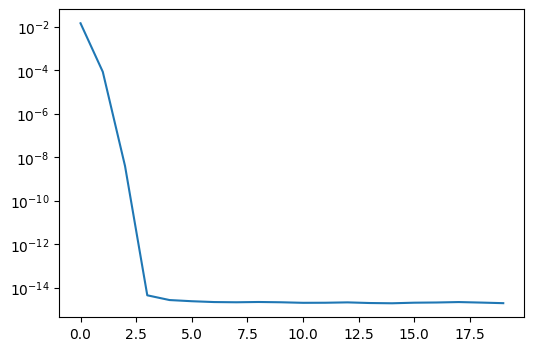

In [162]:
fig, ax = plt.subplots(figsize=(6,4))

num_points=20

ax.plot(unitary_scores[:num_points])
#ax.plot(unitary_scores_1[:num_points])
#ax.plot(unitary_scores_2[:num_points])
ax.set_yscale('log')

fig.show()

In [183]:
X = unitary_group.rvs(N)
unitary_scores=list()

In [184]:
perturbation = np.random.rand(N, N) + 1j*np.random.rand(N, N)
perturbation /= np.linalg.norm(perturbation)
perturbation *= 0.1

In [185]:
X += perturbation

In [186]:
unitary_scores.append(unitary_score(X))

In [187]:
unitary_scores

[0.14399804545869474]

In [188]:
for _ in range(300):
    X+=grad_descent_step(X)
    unitary_scores.append(unitary_score(X))

/var/folders/r3/xn8xq5c17932m2g1b4r3dss80000gn/T/ipykernel_29138/1554473286.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


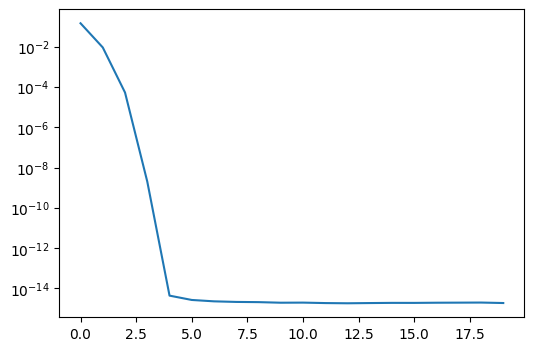

In [189]:
fig, ax = plt.subplots(figsize=(6,4))

num_points=20

ax.plot(unitary_scores[:num_points])
#ax.plot(unitary_scores_1[:num_points])
#ax.plot(unitary_scores_2[:num_points])
ax.set_yscale('log')

fig.show()

In [192]:
X = unitary_group.rvs(N)
unitary_scores=list()

In [193]:
perturbation = np.random.rand(N, N) + 1j*np.random.rand(N, N)
perturbation /= np.linalg.norm(perturbation)
perturbation *= 1

In [194]:
X += perturbation

In [195]:
unitary_scores.append(unitary_score(X))

In [196]:
unitary_scores

[1.5741523014774057]

In [197]:
for _ in range(300):
    X+=grad_descent_step(X)
    unitary_scores.append(unitary_score(X))

/var/folders/r3/xn8xq5c17932m2g1b4r3dss80000gn/T/ipykernel_29138/1554473286.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


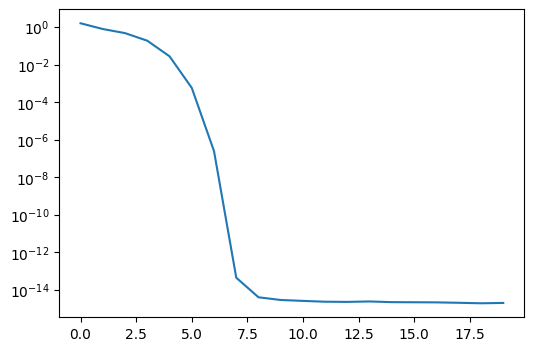

In [198]:
fig, ax = plt.subplots(figsize=(6,4))

num_points=20

ax.plot(unitary_scores[:num_points])
#ax.plot(unitary_scores_1[:num_points])
#ax.plot(unitary_scores_2[:num_points])
ax.set_yscale('log')

fig.show()

In [199]:
unitary_scores[-1]

1.8151971549695805e-15

In [200]:
X = unitary_group.rvs(N)
unitary_scores=list()

In [201]:
perturbation = np.random.rand(N, N) + 1j*np.random.rand(N, N)
perturbation /= np.linalg.norm(perturbation)
perturbation *= 10

In [202]:
X += perturbation

In [203]:
unitary_scores.append(unitary_score(X))

In [204]:
unitary_scores

[77.12570247303451]

In [205]:
for _ in range(300):
    X+=grad_descent_step(X)
    unitary_scores.append(unitary_score(X))

/var/folders/r3/xn8xq5c17932m2g1b4r3dss80000gn/T/ipykernel_29138/2475999233.py:2: RuntimeWarning: overflow encountered in matmul
  diff = X @ np.conj(X.T)
/var/folders/r3/xn8xq5c17932m2g1b4r3dss80000gn/T/ipykernel_29138/2475999233.py:2: RuntimeWarning: invalid value encountered in matmul
  diff = X @ np.conj(X.T)
/var/folders/r3/xn8xq5c17932m2g1b4r3dss80000gn/T/ipykernel_29138/3560967508.py:4: RuntimeWarning: overflow encountered in matmul
  X3 = np.matmul(np.matmul(X, X_c), X)
/var/folders/r3/xn8xq5c17932m2g1b4r3dss80000gn/T/ipykernel_29138/3560967508.py:4: RuntimeWarning: invalid value encountered in matmul
  X3 = np.matmul(np.matmul(X, X_c), X)


/var/folders/r3/xn8xq5c17932m2g1b4r3dss80000gn/T/ipykernel_29138/1554473286.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


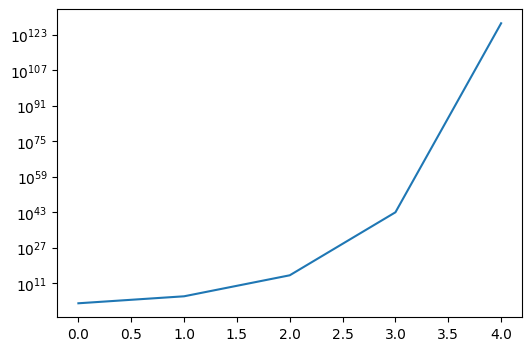

In [206]:
fig, ax = plt.subplots(figsize=(6,4))

num_points=20

ax.plot(unitary_scores[:num_points])
#ax.plot(unitary_scores_1[:num_points])
#ax.plot(unitary_scores_2[:num_points])
ax.set_yscale('log')

fig.show()

In [208]:
unitary_scores[-1]

nan

In [224]:
X = unitary_group.rvs(N)
unitary_scores=list()

In [225]:
perturbation = np.random.rand(N, N) + 1j*np.random.rand(N, N)
perturbation /= np.linalg.norm(perturbation)
perturbation *= 10

In [226]:
X += perturbation

In [227]:
unitary_scores.append(unitary_score(X))

In [228]:
unitary_scores

[77.33502265634195]

In [229]:
for _ in range(300):
    X+=scaled_grad_descent_step(X)
    unitary_scores.append(unitary_score(X))

/var/folders/r3/xn8xq5c17932m2g1b4r3dss80000gn/T/ipykernel_29138/666514804.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


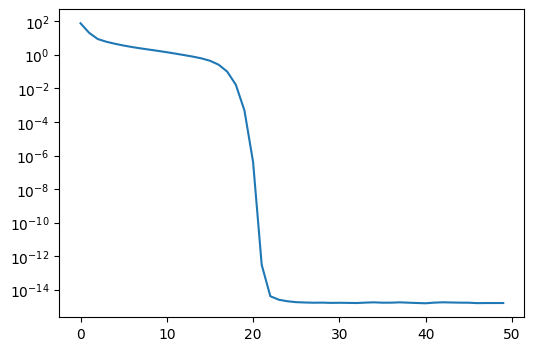

In [231]:
fig, ax = plt.subplots(figsize=(6,4))

num_points=50

ax.plot(unitary_scores[:num_points])
#ax.plot(unitary_scores_1[:num_points])
#ax.plot(unitary_scores_2[:num_points])
ax.set_yscale('log')

fig.show()

In [208]:
unitary_scores[-1]

nan

# Conclusions
* Gradient descent works!
* There is a specific learning rate for optimal local convergence, (analysis performed elsewhere).
    * However this learning rate may result in divergences if initial guess is far from unitary. In this case a lower learning rate would be optimal.
    * This can be addressed by dynamically scaling the learning rate, however further tuning/investigation is required to ensure that the learning rate isn't overtuned to the point that convergence is too slow for large deviations from unitaries.